#### 2. 오버 샘플링 (Over Sampling)
- 소수 클래스의 샘플 수를 증가시켜 클래스 간의 균형을 맞추는 방법.
- 다수 클래스와의 비율을 맞추기 위해 소수 클래스 샘플을 복제하거나 생성하는 샘플링 기법
- 장점 : 모든 데이터를 유지하면서 클래스 불균형 문제를 해결할 수 있다.
- 단점 : 소수 클래스의 샘플을 반복해서 사용하므로 과적합(overfitting) 문제를 유발할 수 있다. 또한, 학습 시간이 길어질 수 있다.

#### 1) RandomOverSampler
- 소수 클래스의 데이터를 무작위로 복제하여 데이터셋의 클래스 불균형을 해결. 
- 소수 클래스의 데이터를 단순히 반복하여 복사하므로 구현이 간단하고 빠르지만, 데이터의 다양성이 부족해질 수 있음


In [15]:
## 샘플 데이터 생성

from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
import pandas as pd
from sklearn.datasets import make_classification

# 데이터 생성
X, y = make_classification(
    n_classes=2,            # 생성할 클래스(레이블)의 수. 여기서는 2개(이진 분류).
    class_sep=2,            # 클래스 간의 분리도. 값이 클수록 클래스 간의 분리가 명확해짐.
    weights=[0.1, 0.9],     # 각 클래스의 비율. 첫 번째 클래스는 10%, 두 번째 클래스는 90%.
    n_informative=3,        # 분류에 유용한 정보성 특징(피처)의 수. 여기서는 3개.
    n_redundant=1,          # 다른 정보성 특징의 선형 조합으로 생성되는 중복 특징의 수. 여기서는 1개.
    flip_y=0,               # 레이블을 무작위로 뒤집는 비율. 여기서는 뒤집지 않음(0%).
    n_features=20,          # 전체 특징의 수. 여기서는 20개.
    n_clusters_per_class=1, # 클래스당 클러스터의 수. 여기서는 1개.
    n_samples=500,         # 생성할 샘플(데이터 포인트)의 수. 여기서는 1000개.
    random_state=10         # 난수 시드. 동일한 출력이 재현되도록 설정.
)

print('Original dataset shape:', Counter(y))

Original dataset shape: Counter({np.int64(1): 450, np.int64(0): 50})


In [16]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(X, y)

print(Counter(y_ros))

Counter({np.int64(1): 450, np.int64(0): 450})


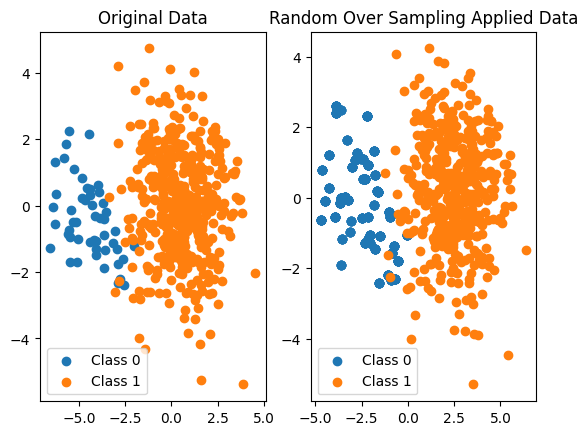

In [17]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# PCA로 2D로 축소
pca = PCA(n_components=2)
# 원본 데이터
X_pca = pca.fit_transform(X)
# 샘플링 데이터
X_ros_pca = pca.fit_transform(X_ros)


# 원본 데이터 시각화
plt.subplot(1, 2, 1)
plt.scatter(X_pca[y == 0, 0], X_pca[y == 0, 1], label='Class 0')
plt.scatter(X_pca[y == 1, 0], X_pca[y == 1, 1], label='Class 1')
plt.title('Original Data')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X_ros_pca[y_ros == 0, 0], X_ros_pca[y_ros == 0, 1], label='Class 0')
plt.scatter(X_ros_pca[y_ros == 1, 0], X_ros_pca[y_ros == 1, 1], label='Class 1')
plt.title('Random Over Sampling Applied Data')
plt.legend()

#### 4) SMOTE (Synthetic Minority Over-sampling Technique)
- 소수 클래스의 데이터 포인트들 사이에서 새로운 합성 샘플을 생성하는 오버샘플링 기법
- 기존 소수 클래스 데이터 포인트들 간의 선형 보간을 통해 새로운 데이터 포인트를 생성함으로써 클래스 간의 균형을 맞춤
- 이 방법은 임의의 소수 클래스 샘플과 그 이웃 샘플을 선택하고, 두 샘플 사이의 선형 보간을 통해 새로운 샘플을 생성
- 장점 : 단순 복제 대신 합성 샘플을 생성하여 데이터 다양성을 증가시키고 과적합 문제를 완화
- 단점 : 데이터의 경계를 명확히 하지 않아 경계 근처의 샘플 생성 시 성능이 떨어질 수 있음

    #### SMOTE의 작동 원리
    
    ![](https://velog.velcdn.com/images/newnew_daddy/post/ac7e0965-b869-413b-8a5f-8acb2ab7aee5/image.png)

    - 오버샘플링 기법 중 합성데이터를 생성하는 방식
    - 소수 클래스에서 무작위로 k포인트를 선택
    - 랜덤 데이터와 k개의 최근접 이웃 간의 유클리디안 거리를 계산 (k-nearest neighbors를 계산)
    - 거리를 0과 1 사이의 랜덤한 수로 곱한 다음 합성 샘플로 소수 클래스에 결과를 추가.
    - 합성 포인트는 선택한 포인트와 인접 포인트 사이에 추가.
    - 소수클래스의 원하는 비율이 충족될 때까지 반복.

In [19]:
from imblearn.over_sampling import SMOTE

# SMOTE 적용
smote = SMOTE(random_state=42)
X_smo, y_smo = smote.fit_resample(X, y)
print('Resampled dataset shape:', Counter(y_smo))

Resampled dataset shape: Counter({np.int64(1): 450, np.int64(0): 450})


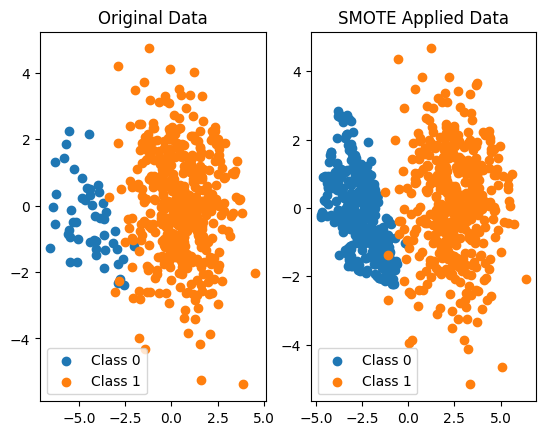

In [25]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# PCA로 2D로 축소
pca = PCA(n_components=2)
# 원본 데이터
X_pca = pca.fit_transform(X)
# 샘플링 데이터
X_smo_pca = pca.fit_transform(X_smo)


# 원본 데이터 시각화
plt.subplot(1, 2, 1)
plt.scatter(X_pca[y == 0, 0], X_pca[y == 0, 1], label='Class 0')
plt.scatter(X_pca[y == 1, 0], X_pca[y == 1, 1], label='Class 1')
plt.title('Original Data')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X_smo_pca[y_smo == 0, 0], X_smo_pca[y_smo == 0, 1], label='Class 0')
plt.scatter(X_smo_pca[y_smo == 1, 0], X_smo_pca[y_smo == 1, 1], label='Class 1')
plt.title('SMOTE Applied Data')
plt.legend()

#### 3) ADASYN (Adaptive Synthetic Sampling)
- 소수 클래스의 데이터 포인트 주변에서 새로운 합성 샘플을 생성하는 오버샘플링 기법
- 이 방법은 소수 클래스의 데이터 포인트 중에서 주위에 다수 클래스의 데이터 포인트가 많은 경우, 즉 경계선 근처에 있는 데이터 포인트를 중심으로 새로운 샘플을 생성.

    #### ADASYN의 작동 원리

    ![](https://velog.velcdn.com/images/newnew_daddy/post/71908f2f-2d0d-44ab-9ea3-722b32d8e644/image.png)

    1. **임의 샘플 생성**: 소수 클래스 데이터의 각 샘플에 대해 k-최근접 이웃(k-nearest neighbors)을 계산합니다.
    2. **가중치 할당**: 각 소수 클래스 샘플에 가중치를 부여합니다. 경계에 가까운 샘플일수록 더 많은 샘플을 생성합니다.
    3. **합성 샘플 생성**: 가중치에 따라 소수 클래스의 샘플 주변에서 새로운 합성 샘플을 생성합니다.

In [22]:
from imblearn.over_sampling import ADASYN

# ADASYN 적용
adasyn = ADASYN(random_state=42)
X_ada, y_ada = adasyn.fit_resample(X, y)
print('Resampled dataset shape:', Counter(y_ada))

Resampled dataset shape: Counter({np.int64(0): 455, np.int64(1): 450})


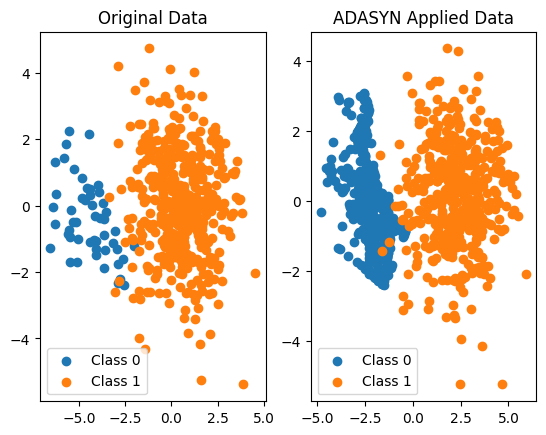

In [24]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# PCA로 2D로 축소
pca = PCA(n_components=2)
# 원본 데이터
X_pca = pca.fit_transform(X)
# 샘플링 데이터
X_ada_pca = pca.fit_transform(X_ada)


# 원본 데이터 시각화
plt.subplot(1, 2, 1)
plt.scatter(X_pca[y == 0, 0], X_pca[y == 0, 1], label='Class 0')
plt.scatter(X_pca[y == 1, 0], X_pca[y == 1, 1], label='Class 1')
plt.title('Original Data')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X_ada_pca[y_ada == 0, 0], X_ada_pca[y_ada == 0, 1], label='Class 0')
plt.scatter(X_ada_pca[y_ada == 1, 0], X_ada_pca[y_ada == 1, 1], label='Class 1')
plt.title('ADASYN Applied Data')
plt.legend()

#### 오버 샘플링 비교 시각화

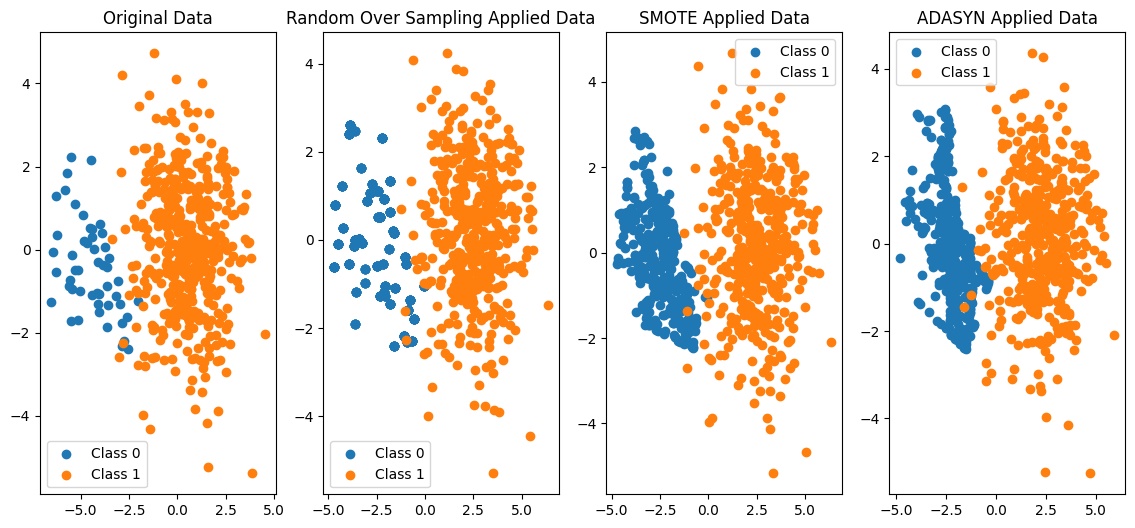

In [27]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# PCA로 2D로 축소
pca = PCA(n_components=2)
# 원본 데이터
X_pca = pca.fit_transform(X)
# 랜덤 샘플러 데이터
X_ros_pca = pca.fit_transform(X_ros)
# SMOTE 데이터
X_smo_pca = pca.fit_transform(X_smo)
# ADASYN 데이터
X_ada_pca = pca.fit_transform(X_ada)

plt.figure(figsize=(14,6))
# 원본 데이터 시각화
plt.subplot(1, 4, 1)
plt.scatter(X_pca[y == 0, 0], X_pca[y == 0, 1], label='Class 0')
plt.scatter(X_pca[y == 1, 0], X_pca[y == 1, 1], label='Class 1')
plt.title('Original Data')
plt.legend()

plt.subplot(1, 4, 2)
plt.scatter(X_ros_pca[y_ros == 0, 0], X_ros_pca[y_ros == 0, 1], label='Class 0')
plt.scatter(X_ros_pca[y_ros == 1, 0], X_ros_pca[y_ros == 1, 1], label='Class 1')
plt.title('Random Over Sampling Applied Data')
plt.legend()

plt.subplot(1, 4, 3)
plt.scatter(X_smo_pca[y_smo == 0, 0], X_smo_pca[y_smo == 0, 1], label='Class 0')
plt.scatter(X_smo_pca[y_smo == 1, 0], X_smo_pca[y_smo == 1, 1], label='Class 1')
plt.title('SMOTE Applied Data')
plt.legend()

plt.subplot(1, 4, 4)
plt.scatter(X_ada_pca[y_ada == 0, 0], X_ada_pca[y_ada == 0, 1], label='Class 0')
plt.scatter(X_ada_pca[y_ada == 1, 0], X_ada_pca[y_ada == 1, 1], label='Class 1')
plt.title('ADASYN Applied Data')
plt.legend()